# Demo for LumiSpy package working with AttoLight SEM CL data

This notebook shows:

- Loading a `HYPCard.sur` file correctly with the lumispy load function
- Plotting cathodoluminescence data in different ways
- Dealing with metadata
- Correcting for spectral defects

Import packages:

In [1]:
# %matplotlib notebook
# Use '%matplotlib widget' in JupterLab and '%matplotlib notebook' in JupyterNotebook for interactive inline functionality (e.g. on binder)
#For pop-up window plots on your local computer, use '%matplotlib tk' or '%matplotlib qt' instead
import hyperspy.api as hs
import lumispy as lum
import os, glob

## Loading HYPCard files

Use the `hs.load()` function with the `signal_type` class for AttoLight CL-SEM specific data (`CL_SEM`).
State the relative path to the `HYPCard.sur` file.

*You can also leave the path empty. A pop-up window will appear to select the `HYPCard.sur` file from the browser.*

In [2]:
root_folder = r"C:\Users\cobia\OneDrive - University of Cambridge\CL\COBI-20250804\HYP-SHORTEND09-REDO700"
path = os.path.join(root_folder, 'HYPCard.sur')

cl = hs.load(path, signal_type='CL_SEM',)
cl

<CLSEMSpectrum, title: , dimensions: (10, 10|1024)>

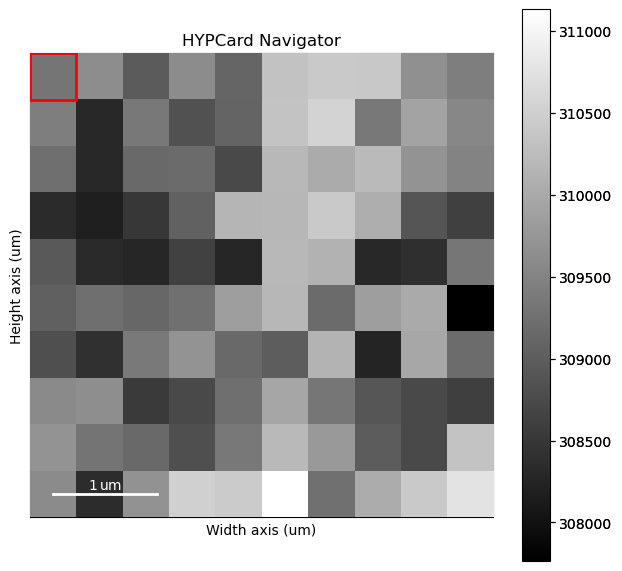

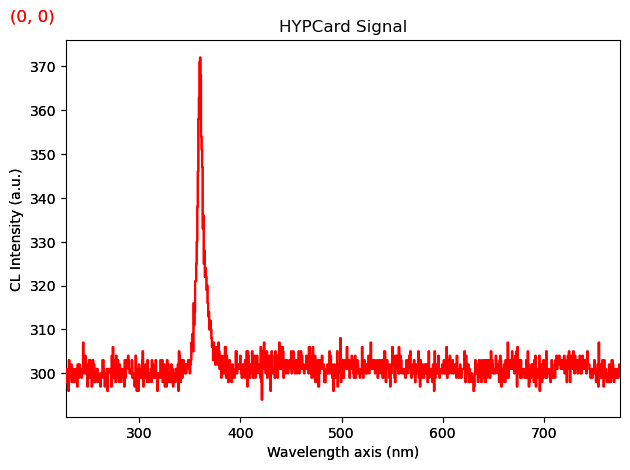

In [3]:
cl.plot()

In [4]:
# root_folder = r"C:\Users\cobia\OneDrive - University of Cambridge\CL\session_2025_02_12_2\HYP-RUNGUNNARRUN"
# path = os.path.join(root_folder, 'HYPCard.sur')

# cl = hs.load(path, signal_type='CL_SEM',)
# cl

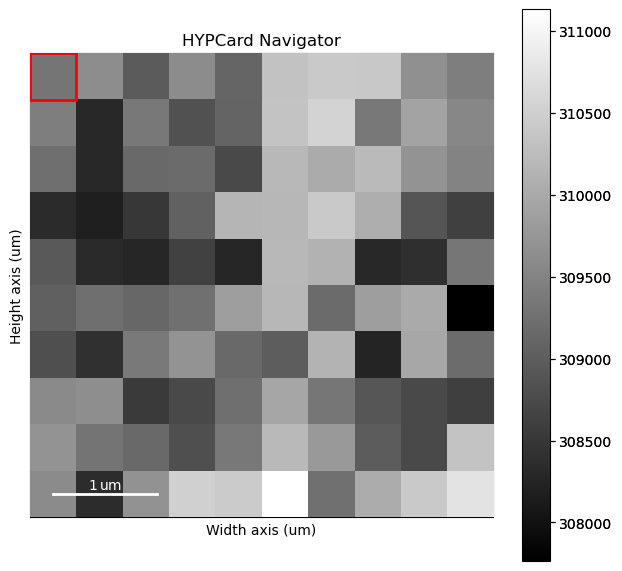

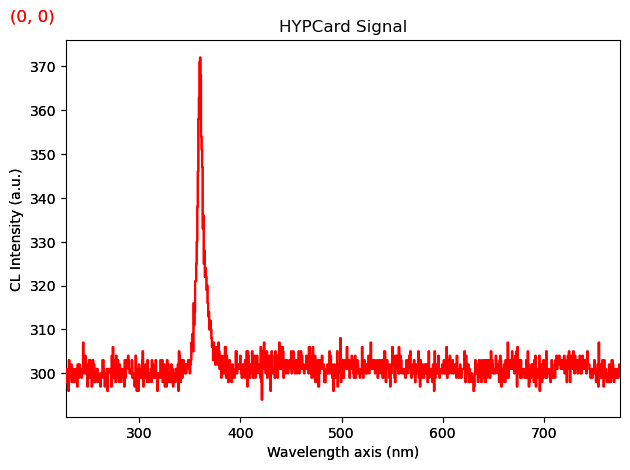

In [5]:
cl.plot()

## Metadata

The `.sur` file contains the general Hyperspy-specific metadata (`cl.metadata`).
A more detailed metadata is also available via `cl.original_metadata`:

In [6]:
cl.metadata

├── Acquisition_instrument
│   ├── Detector
│   │   ├── binning = ('FVB', 1)
│   │   ├── detector_type = CCD
│   │   ├── integration_time = 0.01
│   │   ├── integration_time_units = 0.01
│   │   ├── model = A.920
│   │   ├── pixel_size = 0.026
│   │   └── pixel_size_units = mm
│   ├── SEM
│   │   ├── Stage
│   │   │   ├── rotation = 0.0
│   │   │   ├── rotation_units = deg
│   │   │   ├── tilt_alpha = 0.0
│   │   │   ├── tilt_alpha_units = deg
│   │   │   ├── tilt_beta = -0.0
│   │   │   ├── tilt_beta_units = deg
│   │   │   ├── x = 2.326515
│   │   │   ├── x_units = mm
│   │   │   ├── y = 1.14607
│   │   │   ├── y_units = mm
│   │   │   ├── z = 0.592042
│   │   │   └── z_units = mm
│   │   ├── beam_energy = 2989.08
│   │   ├── beam_energy_units = V
│   │   ├── magnification = 32767.996094
│   │   └── microscope = Attolight Allalin
│   └── Spectrometer
│       ├── Filter
│       │   └── filter_type = None
│       ├── Grating = 150/500
│       ├── blazing_wavelength = 0
│       ├── blazing_wavelength_units = nm
│       ├── central_wavelength = 500.0
│       ├── central_wavelength_units = nm
│       ├── entrance_slit_width = 700
│       ├── entrance_slit_width_units = um
│       ├── exit_slit_width = 0
│       ├── exit_slit_width_units = um
│       ├── groove_density = 150
│       └── groove_density_units = gr/mm
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.2.0
│   │       ├── io_plugin = rsciio.digitalsurf
│   │       ├── operation = load
│   │       └── timestamp = 2025-08-07T12:43:50.388220+01:00
│   ├── authors = 
│   ├── date = 
│   ├── original_filename = HYPCard.sur
│   ├── time = 
│   └── title = 
└── Signal
    ├── quantity = CL Intensity (a.u.)
    └── signal_type = CL_SEM

In [7]:
cl.original_metadata.Object_0_Channel_0.Parsed

├── CCD
│   ├── Baseline Clamp = Off
│   ├── Camera Model = A.920
│   ├── Capture Depth = 1024
│   ├── Exposure Time = 0.01
│   ├── Exposure Time_units = s
│   ├── Horizontal Binning = 1
│   ├── Pixel Width = 0.026
│   ├── Pixel Width_units = mm
│   ├── ReadMode = FVB
│   ├── Readout Rate (horizontal pixel shift) = 1Mhz
│   ├── Signal Amplification = x1
│   ├── Speed (vertical pixel shift) = 3.3
│   ├── Temperature = -69
│   ├── Temperature_units = °C
│   └── Voltage Amplitude (vertical pixel shift) = normal
├── CHANNELS
│   ├── Channel1 = SE
│   └── Channel2 = CCD
├── SCAN
│   ├── HYP Scan Dwelltime = 10.0
│   ├── HYP Scan Dwelltime_units = ms
│   ├── InitialRotate = 0.0
│   ├── InitialRotate_units = deg
│   ├── Mode Image = HYP
│   ├── Reference_Size_X = 512
│   ├── Reference_Size_Y = 512
│   ├── Resolution_X = 10
│   ├── Resolution_X_units = pixels
│   ├── Resolution_Y = 10
│   ├── Resolution_Y_units = pixels
│   ├── Rotate = 0.0
│   ├── Rotate_units = deg
│   ├── Size_X = 512
│   ├── Size_Y = 512
│   ├── Start_X = 0
│   ├── Start_Y = 0
│   ├── Voltage Calibration Range_X = 8.274698
│   ├── Voltage Calibration Range_X_units = V
│   ├── Voltage Calibration Range_Y = 8.274698
│   └── Voltage Calibration Range_Y_units = V
├── SEM
│   ├── Aperture = 50
│   ├── Aperture Chamber Pressure = 7.0281e-08
│   ├── Aperture Chamber Pressure_units = Torr
│   ├── Astigmatism 1 X = -0.01
│   ├── Astigmatism 1 X_units = V
│   ├── Astigmatism 1 Y = 0.0
│   ├── Astigmatism 1 Y_units = V
│   ├── Astigmatism 2 X = 24.72
│   ├── Astigmatism 2 X_units = V
│   ├── Astigmatism 2 Y = -15.48
│   ├── Astigmatism 2 Y_units = V
│   ├── Attomic ReadedMagnification = 49300.0
│   ├── Attomic zoom = 47
│   ├── Beam Current = 1.42
│   ├── Beam Current_units = uA
│   ├── Beam Energy = 2989.08
│   ├── Beam Energy_units = V
│   ├── Blanker = Off
│   ├── Cathode Heating Current = 2.27
│   ├── Cathode Heating Current_units = A
│   ├── Cathode Heating Voltage = 1.99
│   ├── Cathode Heating Voltage_units = V
│   ├── Deflector 1 X = 11.72
│   ├── Deflector 1 X_units = V
│   ├── Deflector 1 Y = 26.72
│   ├── Deflector 1 Y_units = V
│   ├── Deflector 2 X = -0.01
│   ├── Deflector 2 X_units = V
│   ├── Deflector 2 Y = -0.01
│   ├── Deflector 2 Y_units = V
│   ├── Emission Current = 230.0
│   ├── Emission Current_units = uA
│   ├── Emission Status = ON
│   ├── Extractor Voltage = 4975.5
│   ├── Extractor Voltage_units = V
│   ├── Gun Chamber Pressure = 2.1977e-10
│   ├── Gun Chamber Pressure_units = Torr
│   ├── Gun Lens = 0.95095
│   ├── Gun Lens_units = A
│   ├── Isolation Valve = Opened
│   ├── Objective Lens = 0.222603
│   ├── Objective Lens_units = A
│   ├── Real Magnification = 32767.996094
│   ├── Reference Field of view = 4.0
│   ├── Reference Field of view_units = um
│   ├── Reference Screen Size = 131.072
│   ├── Reference Screen Size_units = mm
│   ├── Scintillator Voltage = 6001.0
│   ├── Scintillator Voltage_units = V
│   ├── Suppressor Bias = 1001.15
│   └── Suppressor Bias_units = V
├── SITE IMAGE
│   ├── Dwell Time = 9999.999776
│   ├── Dwell Time_units = us
│   ├── Number of pixels (x axis) = 10
│   ├── Number of pixels (x axis)_units = px
│   ├── Number of pixels (y axis) = 10
│   ├── Number of pixels (y axis)_units = px
│   ├── Reference Field of view = 4.0
│   ├── Reference Field of view_units = um
│   ├── stage_model = 10010
│   ├── stage_position_x = 2.326515
│   ├── stage_position_y = 1.14607
│   ├── stage_position_z = 0.592042
│   ├── stage_rotation_x = 0.0
│   ├── stage_rotation_y = -0.0
│   └── stage_rotation_z = 0.0
└── SPECTROMETER
    ├── Camera Tilt Angle = 2.89
    ├── Camera Tilt Angle_units = deg
    ├── Central wavelength = 500.0
    ├── Central wavelength_units = nm
    ├── Ebert Angle = -9.8
    ├── Ebert Angle_units = deg
    ├── Entrance slit width = 700
    ├── Entrance slit width_units = um
    ├── Exit mirror position = lateral
    ├── Exit slit width = 0
    ├── Exit slit width_units = um
    ├── Exit spectral resolution = 0
   

## Data pre-processing

Let's start some pre-processing methods:

### Background removal

In the AttoLight system, if a background is taken before mapping, the background is stored automatically in the signal folder.

Otherwise, manually load a background file, using `np.loadtxt(path_to_file)`.

In [8]:
try:
    bkg_path = os.path.join(root_folder, '*.txt')
    bkg_path = glob.glob(bkg_path)[0]
except IndexError:
    print('Please, specify a `background.txt` file path below:')
    bkg_path = ''

bkg_path = r'C:\Users\cobia\OneDrive - University of Cambridge\CL\COBI-20250804\BG-10MSBKG20250805-700-10ms-2025-08-05-15h37m52s.txt'    

In [9]:
import numpy as np
cl_bkg = np.loadtxt(bkg_path)[1]
print(cl_bkg.shape)

# Run background subtraction
cl = cl - cl_bkg

(1024,)


### Correction of acquisition defects

Correct for the intrinsic shift caused by the misalignment of the grating with the spectrometer aperture centre.

In [11]:
calibration_factor = 131072
grating = int(cl.original_metadata.Object_0_Channel_0.Parsed.SPECTROMETER.Grating__Groove_Density)

if grating == 150:
    correction_factor_grating = 2.73E-04 # 150 gr/mm grating
elif grating == 600:
    correction_factor_grating = 6.693659836087227e-05 # 600 gr/mm grating
else:
    raise ImportError('Grating correction not available')

fov = cl.original_metadata.Object_0_Channel_0.Parsed.SITE_IMAGE.Field_of_view *1e6

grating_calibrations = {
    'cal_factor' : calibration_factor,
    'corr_factor_grating' : correction_factor_grating,
    'field_of_view_um' : fov,
}

AttributeError: Field_of_view

In [21]:
cl.correct_grating_shift(*grating_calibrations.values())

NameError: name 'grating_calibrations' is not defined

The edges of the scan get higher intensities, so they can be cropped. 
If you set the `inplace` parameter to `True` the original CLSEMSpectrum object will be modified, if `False` a cropped copy of it will be created.

In [22]:
cl = cl.crop_edges(crop_px=5)

Remove the cosmic ray saturated pixels (pixels with sharp spikes):

In [10]:
cl.remove_spikes(inplace=True)

c:\Users\cobia\anaconda3\envs\lumispy310\lib\site-packages\lumispy\signals\cl_spectrum.py:109: UserWarning: Threshold value: 1.00
  warn(


If not all spikes are removed, you can use the GUI to manually select pixels by calling `cl.remove_spikes(interactive=True, inplace=True)`

## Plotting data

Plot the corrected data:

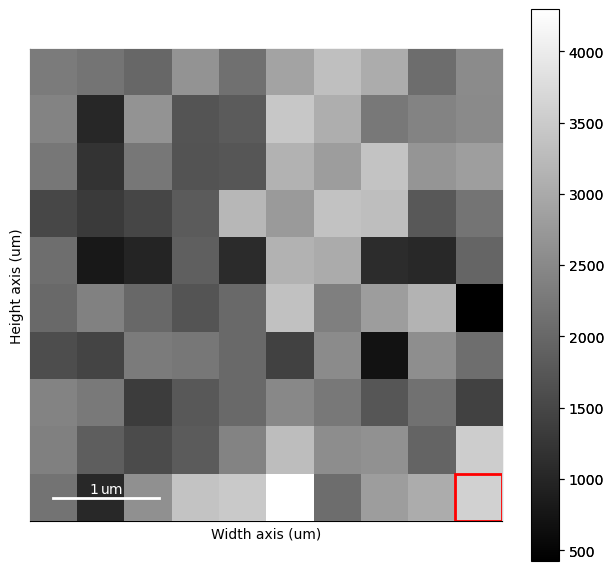

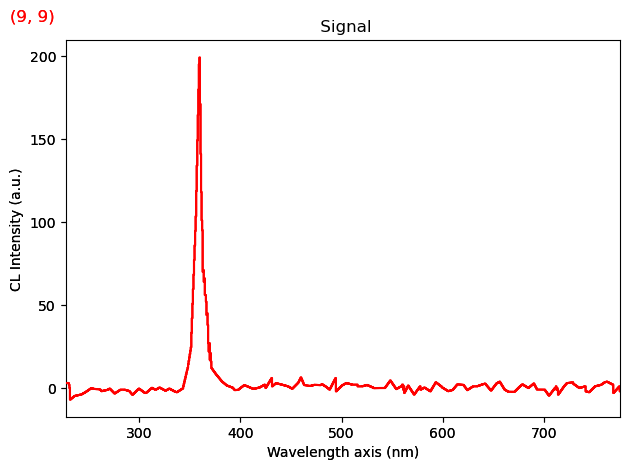

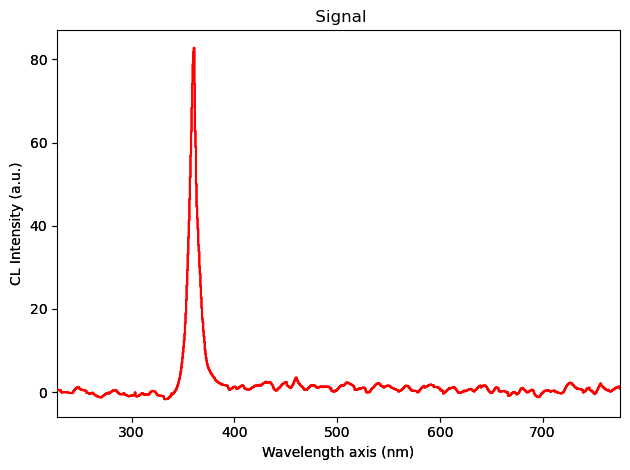

In [11]:
cl.plot()
cl.mean().plot()

## Save the data as `.hspy` format

Look out for other `lumispy-demos` notebooks to find examples on how to analyse and fit luminescence data.
Many notebooks start directly with a `.hspy` file format.

In [12]:
print(root_folder + r"\HYPCard_corrected.hspy")
cl.save(root_folder + r"\HYPCard_corrected.hspy")


C:\Users\cobia\OneDrive - University of Cambridge\CL\COBI-20250804\HYP-SHORTEND09-REDO700\HYPCard_corrected.hspy


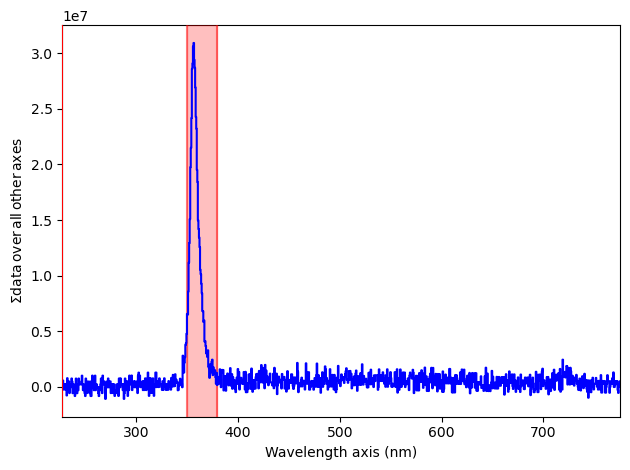

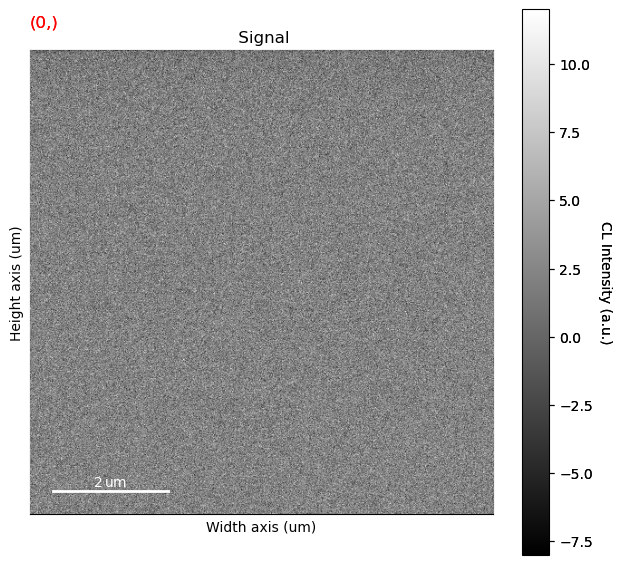

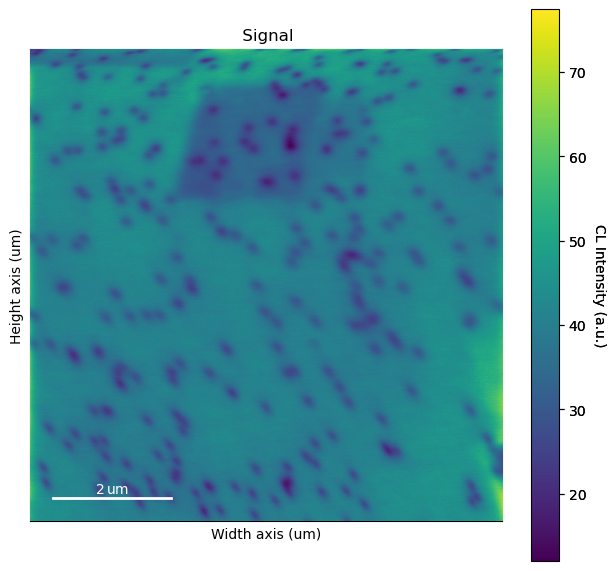

In [12]:
im = cl.T
im.plot()
roi1 = hs.roi.SpanROI(left=350, right=380) #sets a digitalbandfilter
im_roi1 = roi1.interactive(im, color="red")
im_roi1_mean = hs.interactive(im_roi1.mean,
                        event=roi1.events.changed,
                        recompute_out_event=None)
im_roi1_mean.plot(cmap='viridis')